In [30]:
import login
import psycopg2
try:
    conn = psycopg2.connect(user = login.user,
                                  password = login.password,
                                  host = "127.0.0.1",
                                  port = "5432",
                                  database = "cookingapp")

    cur = conn.cursor()
    print ( conn.get_dsn_parameters(),"\n")
    cur.execute("SELECT version();")
    record = cur.fetchone()
    print("You are connected to - ", record,"\n")
except (Exception, psycopg2.Error) as error :
    print ("Error while connecting to PostgreSQL", error)

{'user': 'cook', 'dbname': 'cookingapp', 'host': '127.0.0.1', 'port': '5432', 'tty': '', 'options': '', 'sslmode': 'prefer', 'sslcompression': '0', 'krbsrvname': 'postgres', 'target_session_attrs': 'any'} 

You are connected to -  ('PostgreSQL 12.0, compiled by Visual C++ build 1914, 64-bit',) 



In [4]:
import pandas as pd

In [31]:
df = pd.read_sql("select title, rating, sodium, fat, protein, calories from recept", conn)

In [32]:
cur.close()
conn.close()

In [33]:
df.describe()

,rating,sodium,fat,protein,calories
count,20100.000000,1.597400e+04,1.590800e+04,15929.000000,1.597600e+04
mean,3.713060,6.211474e+03,3.460975e+02,99.946199,6.307857e+03
std,1.343144,3.328903e+05,2.043102e+04,3835.616663,3.585851e+05
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,3.750000,8.000000e+01,7.000000e+00,3.000000,1.980000e+02
50%,4.375000,2.940000e+02,1.700000e+01,8.000000,3.310000e+02
75%,4.375000,7.110000e+02,3.300000e+01,27.000000,5.860000e+02
max,5.000000,2.767511e+07,1.722763e+06,236489.000000,3.011122e+07


Nesmyslné hodnoty?!

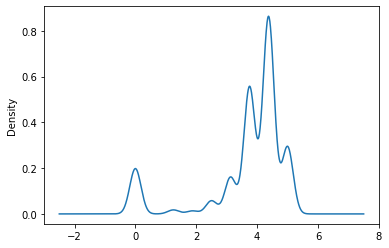

In [13]:
df.rating.plot.kde()

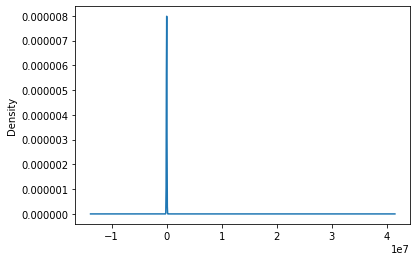

In [14]:
df.sodium.plot.kde()

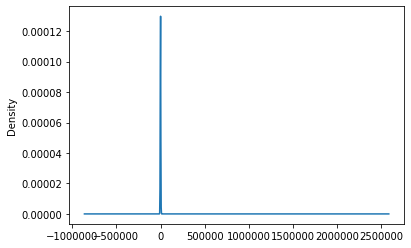

In [15]:
df.fat.plot.kde()

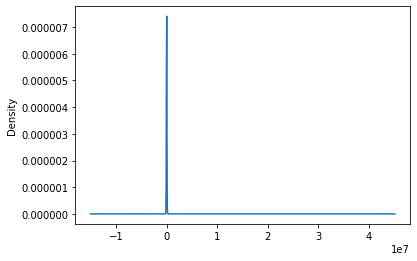

In [16]:
df.calories.plot.kde()

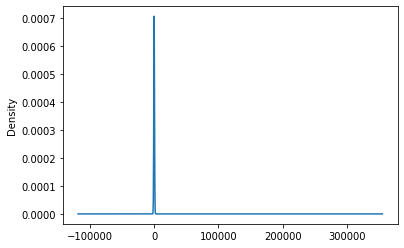

In [17]:
df.protein.plot.kde()

In [34]:
df.loc[df.fat > 1e4]

,title,rating,sodium,fat,protein,calories
1039,"Rice Pilaf with Lamb, Carrots, and Raisins",5.000,3134853.0,221495.0,236489.0,4157357.0
2369,Lamb Köfte with Tarator Sauce,5.000,7540990.0,44198.0,166471.0,4518216.0
4120,Caramelized Apple and Pear Pie,3.125,3449373.0,186642.0,58324.0,3358029.0
5090,Deep-Dish Wild Blueberry Pie,4.375,27570999.0,1716279.0,200210.0,29997918.0
5522,Chocolate-Almond Pie,3.125,3449512.0,186660.0,58334.0,3358273.0
7753,"Rice Pilaf with Lamb, Carrots, and Raisins",5.000,3134853.0,221495.0,236489.0,4157357.0
9082,Pear-Cranberry Mincemeat Lattice Pie,4.375,27675110.0,1722763.0,200968.0,30111218.0
15627,"Apricot, Cranberry and Walnut Pie",4.375,12005810.0,747374.0,87188.0,13062948.0


In [36]:
df.loc[df.sodium > 1e5]

,title,rating,sodium,fat,protein,calories
1039,"Rice Pilaf with Lamb, Carrots, and Raisins",5.000,3134853.0,221495.0,236489.0,4157357.0
2369,Lamb Köfte with Tarator Sauce,5.000,7540990.0,44198.0,166471.0,4518216.0
2609,Whole Branzino Roasted in Salt,5.000,132220.0,20.0,53.0,417.0
4120,Caramelized Apple and Pear Pie,3.125,3449373.0,186642.0,58324.0,3358029.0
5090,Deep-Dish Wild Blueberry Pie,4.375,27570999.0,1716279.0,200210.0,29997918.0
5522,Chocolate-Almond Pie,3.125,3449512.0,186660.0,58334.0,3358273.0
7753,"Rice Pilaf with Lamb, Carrots, and Raisins",5.000,3134853.0,221495.0,236489.0,4157357.0
8451,Baked Oysters with Bacon,0.000,116178.0,24.0,29.0,443.0
9082,Pear-Cranberry Mincemeat Lattice Pie,4.375,27675110.0,1722763.0,200968.0,30111218.0
12895,Red Snapper Baked in Salt with Romesco Sauce,4.375,132025.0,20.0,49.0,425.0
